<a href="https://colab.research.google.com/github/GoradiaNishant/Deep-Learning/blob/main/UNet_(Brain_Tumor_Image_Segmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unet

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
img_width = 128
img_height = 128
img_channels = 3

In [ ]:
inputs = tf.keras.layers.Input((img_width,img_height,img_channels))

Model architecture initialization
###**Down path**


In [ ]:
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [ ]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

In [ ]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

In [ ]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

In [ ]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

In [ ]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

##**Expansive Path**

In [ ]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [ ]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [ ]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [ ]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [ ]:
outputs = tf.keras.layers.Conv2D(1, (1,1), activation = 'sigmoid')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nucle.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images

/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images'

In [ ]:
w, h = 128,128

In [ ]:
import os
ids = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images"))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  100


In [ ]:
import glob
train = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/*"))
train_mask = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_segmentation/*.png"))
print(f'Total Train Images : {len(train)}\nTotal Mask Image : {len(train_mask)}')

Total Train Images : 100
Total Mask Image : 100


In [ ]:
import numpy as np
X = np.zeros((len(train), h, w, 3), dtype=np.float32)
y = np.zeros((len(train_mask), h, w, 1), dtype=np.float32)

In [ ]:
from tqdm.notebook import trange, tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
for n, (img, mimg) in tqdm(enumerate(zip(train, train_mask))):
  ##print(n, img, mimg)
  # Load images
  img = load_img(img)
  x_img = img_to_array(img)
  x_img = resize(x_img, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask = img_to_array(load_img(mimg, color_mode = "grayscale"))
  mask = resize(mask, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X[n] = x_img/255.0
  y[n] = mask/255.0

0it [00:00, ?it/s]

In [ ]:
# Save the files in Numpy array for reusability
np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy', X)
np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy', y)
# print(X.shape, y.shape)
X = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy')
print(X.shape, y.shape)

(100, 128, 128, 3) (100, 128, 128, 1)


In [ ]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 128, 128, 3) (80, 128, 128, 1) (20, 128, 128, 3) (20, 128, 128, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


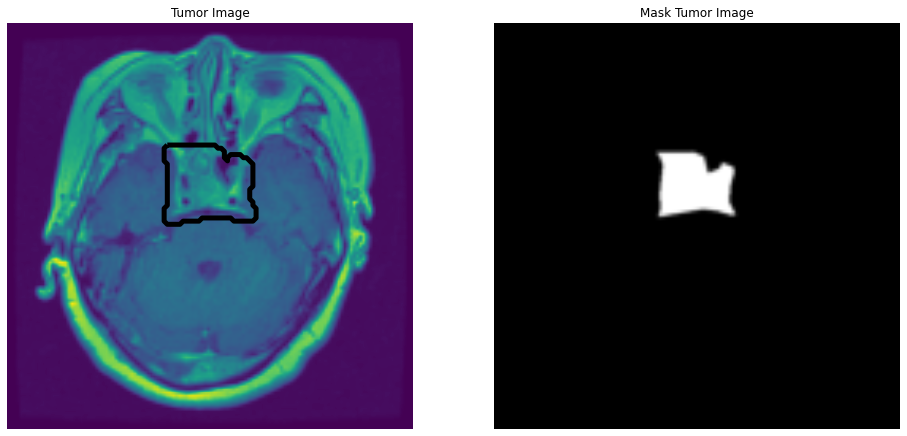

In [ ]:
# Visualize any randome image along with the mask
import random
import matplotlib.pyplot as plt
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 10))

ax1.imshow(X_train[ix, ..., 0], interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Tumor Image')
ax1.set_axis_off()
ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Mask Tumor Image')
ax2.set_axis_off()

In [ ]:
result = model.fit(X_train, y_train, batch_size=2, epochs=100, callbacks=callbacks, validation_data=(X_test, y_test), use_multiprocessing=True, workers = 31, verbose=2)

Epoch 1/100
40/40 - 35s - loss: 0.3162 - accuracy: 0.7645 - val_loss: 0.1748 - val_accuracy: 0.8099
Epoch 2/100
40/40 - 1s - loss: 0.1509 - accuracy: 0.7874 - val_loss: 0.1121 - val_accuracy: 0.8099
Epoch 3/100
40/40 - 1s - loss: 0.1495 - accuracy: 0.7874 - val_loss: 0.1227 - val_accuracy: 0.8099
Epoch 4/100
40/40 - 1s - loss: 0.1391 - accuracy: 0.7874 - val_loss: 0.1128 - val_accuracy: 0.8099
Epoch 5/100
40/40 - 1s - loss: 0.1436 - accuracy: 0.7874 - val_loss: 0.1126 - val_accuracy: 0.8099


In [ ]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('tumor Image')
    ax[0].set_axis_off()

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('tumor Mask Image')
    ax[1].set_axis_off()

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Segmented image')
    ax[2].set_axis_off()
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('tumor Mask binary Image');
    ax[3].set_axis_off()    

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.1126 - accuracy: 0.8099


[0.1126338467001915, 0.8099365234375]

In [ ]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


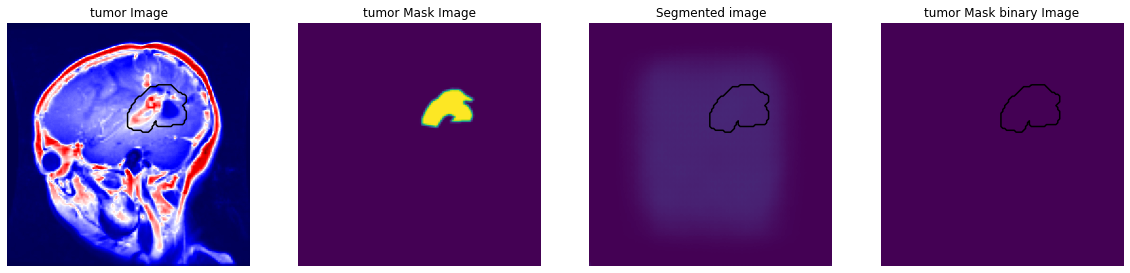

In [ ]:
plot_sample(X_test, y_test, preds_val, preds_val_t,18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


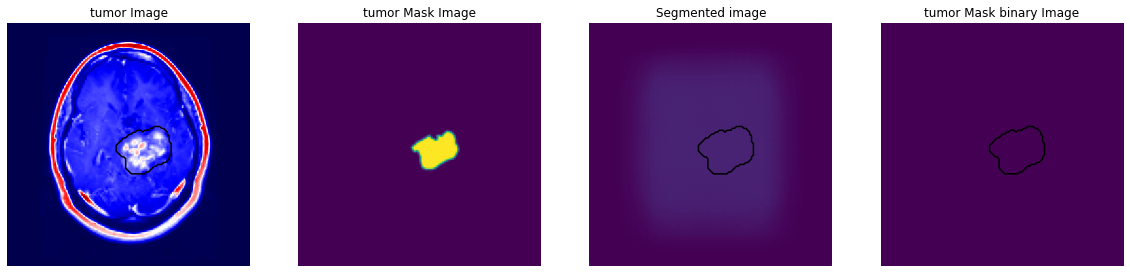

In [ ]:
plot_sample(X_test, y_test, preds_val, preds_val_t)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

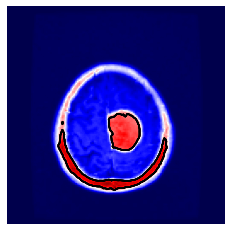

In [ ]:
fileloc = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg" #@param ["/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg"]

def predictImage(fileloc):
  X1 = np.zeros((len(train), h, w, 3), dtype=np.float32)
  y1 = np.zeros((len(train), h, w, 1), dtype=np.float32)

  # Load images
  img1 = load_img(fileloc)
  img2 = load_img(fileloc, color_mode = "grayscale")

  x_img1 = img_to_array(img1)
  x_img1 = resize(x_img1, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask1 = img_to_array(img2)
  mask1 = resize(mask1, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X1[0] = x_img1/255.0
  y1[0] = mask1/255.0

  ## show imagespv = new_model.predict(X1, verbose=1)
  pr = new_model.predict(X1)

  has_mask = y1[0].max() > 0
  # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # ax[0].imshow(X1[0, ..., 0], cmap='seismic')
  # ax[1].contour(y[0].squeeze(), colors='k', levels=[0.5])

  # fig, ax = plt.subplots(1, 2, figsize=(14, 7))
  plt.imshow(X1[0, ..., 0], cmap='seismic')
  if has_mask:
      plt.contour(y1[0].squeeze(), colors='k', levels=[0.5])
  plt.axis('off')

  # plt.set_title('tumor Image')
  # plt.set_axis_off()
  # pv_t = (pr > 0.5).astype(np.uint8)

  # plot_sample(X1, y1, pr, pv_t,0)

for i in range(6):
  predictImage(fileloc)

In [ ]:
# new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/0001-0193.mkv')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
      break
    
    cv2_imshow(frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

## resnet

In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
img_width = 128
img_height = 128
img_channels = 3

In [ ]:
inputs_t = tf.keras.Input(shape=(img_width,img_height,img_channels))

In [ ]:
res_model=tf.keras.applications.ResNet50(include_top=False,weights="imagenet",input_tensor=inputs_t)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
to_res=(128,128)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda image:tf.image.resize(image,to_res)))
model.add(res_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy')
print(X.shape, y.shape)

(100, 128, 128, 3) (100, 128, 128, 1)


In [ ]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 128, 128, 3) (80, 128, 128, 1) (20, 128, 128, 3) (20, 128, 128, 1)


In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nucle.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
model.compile(loss='categorical_crossentrophy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
result = model.fit(X_train, y_train, batch_size=32, epochs=10, callbacks=callbacks, validation_data=(X_test, y_test), use_multiprocessing=True, workers = 31, verbose=2)